Link:  https://buffml.com/run-all-machine-learning-models-in-once/

In [ ]:
# import python library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Load Dataset
df_full = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Dataset/Titanic.csv')

In [ ]:
df_full

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [ ]:
df_full['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

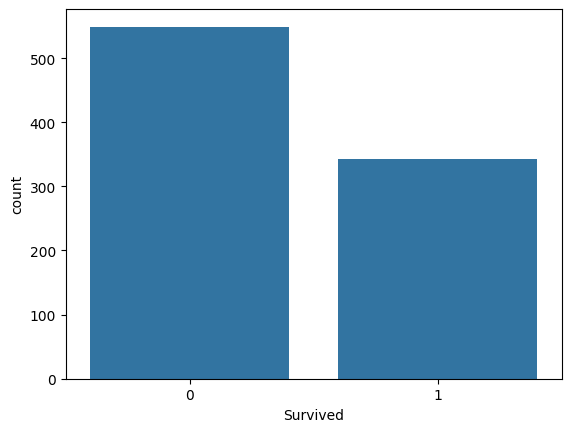

In [ ]:
# Plot Target Feature
sns.countplot(x='Survived', data=df_full)
plt.show()

In [ ]:
# Filled up missing value with the median
Age = df_full['Age'].fillna(value = df_full['Age'].median())

In [ ]:
# Drop unnecessary features
df_drop = df_full.drop(['PassengerId', 'Name', 'SibSp', 'Parch', 'Ticket', 'Cabin', 'Embarked', 'Age'], axis=1, inplace=True)

In [ ]:
# Concate Age with filled values
df = pd.concat([df_full, Age], axis=1)

In [ ]:
# Apply One Hot Encoder for Sex feature
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(drop='first', sparse=False, dtype=np.int32)

In [ ]:
df_ohe = ohe.fit_transform(df[['Sex']])

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [ ]:
# Show all features value with Encoded value in an array
np.hstack((df[['Survived', 'Pclass', 'Age', 'Fare']].values, df_ohe))

array([[ 0.    ,  3.    , 22.    ,  7.25  ,  1.    ],
       [ 1.    ,  1.    , 38.    , 71.2833,  0.    ],
       [ 1.    ,  3.    , 26.    ,  7.925 ,  0.    ],
       ...,
       [ 0.    ,  3.    , 28.    , 23.45  ,  0.    ],
       [ 1.    ,  1.    , 26.    , 30.    ,  1.    ],
       [ 0.    ,  3.    , 32.    ,  7.75  ,  1.    ]])

In [ ]:
# Convert array to dataframe and rename Sex column to gender
Gender = pd.DataFrame(df_ohe, columns=['Gender'])
Gender.head(5)

,Gender
0,1
1,0
2,0
3,0
4,1


In [ ]:
# Concate gender column and drop sex column
dataset = pd.concat([df,Gender], axis=1).drop(columns=['Sex'])
dataset

,Survived,Pclass,Fare,Age,Gender
0,0,3,7.2500,22.0,1
1,1,1,71.2833,38.0,0
2,1,3,7.9250,26.0,0
3,1,1,53.1000,35.0,0
4,0,3,8.0500,35.0,1
...,...,...,...,...,...
886,0,2,13.0000,27.0,1
887,1,1,30.0000,19.0,0
888,0,3,23.4500,28.0,0
889,1,1,30.0000,26.0,1


In [ ]:
# Rename dataset to df
df = dataset
df

,Survived,Pclass,Fare,Age,Gender
0,0,3,7.2500,22.0,1
1,1,1,71.2833,38.0,0
2,1,3,7.9250,26.0,0
3,1,1,53.1000,35.0,0
4,0,3,8.0500,35.0,1
...,...,...,...,...,...
886,0,2,13.0000,27.0,1
887,1,1,30.0000,19.0,0
888,0,3,23.4500,28.0,0
889,1,1,30.0000,26.0,1


In [ ]:
# Define input and output/target features
X = df.drop(['Survived'], axis=1)
y = df['Survived']

In [ ]:
# Apply Scaler for input/independent features
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()

In [ ]:
# Scale input/independent features
X = scale.fit_transform(X)
X

array([[ 0.82737724, -0.50244517, -0.56573646,  0.73769513],
       [-1.56610693,  0.78684529,  0.66386103, -1.35557354],
       [ 0.82737724, -0.48885426, -0.25833709, -1.35557354],
       ...,
       [ 0.82737724, -0.17626324, -0.1046374 , -1.35557354],
       [-1.56610693, -0.04438104, -0.25833709,  0.73769513],
       [ 0.82737724, -0.49237783,  0.20276197,  0.73769513]])

In [ ]:
# Split train and test data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
pip install lazypredict

In [ ]:
from lazypredict.Supervised import LazyClassifier
clf = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric=None, predictions=True)
models, predictions = clf.fit(X_train, X_test, y_train, y_test)
models

 97%|█████████▋| 28/29 [00:03<00:00,  7.44it/s]

[LightGBM] [Info] Number of positive: 268, number of negative: 444
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002843 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 179
[LightGBM] [Info] Number of data points in the train set: 712, number of used features: 4
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.376404 -> initscore=-0.504838
[LightGBM] [Info] Start training from score -0.504838
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


100%|██████████| 29/29 [00:03<00:00,  7.31it/s]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
KNeighborsClassifier,0.82,0.81,0.81,0.82,0.05
LabelSpreading,0.82,0.80,0.80,0.81,0.18
LabelPropagation,0.82,0.80,0.80,0.81,0.09
XGBClassifier,0.81,0.80,0.80,0.81,0.47
SVC,0.82,0.80,0.80,0.81,0.04
LGBMClassifier,0.80,0.80,0.80,0.80,0.36
AdaBoostClassifier,0.81,0.79,0.79,0.81,0.38
NearestCentroid,0.78,0.78,0.78,0.78,0.06
ExtraTreesClassifier,0.79,0.78,0.78,0.79,0.38


In [ ]:
# Fit all regression models
# reg = LazyRegressor(predictions=True)
# models, predictions = reg.fit(X_train, X_test, y_train, y_test)
# models